In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
import galpy.util.coords as coords
import os
import sys
import pandas as pd
from procedure import *
from scipy import stats

start at: 2022-04-03 15:33:10.992218
end at: 2022-04-03 15:33:10.995399


In [2]:
!pwd

/work2/07428/binod/stampede2/resonance_sweeping_low_res_sims


In [3]:
!hostname
!pwd

c427-011.stampede2.tacc.utexas.edu
/work2/07428/binod/stampede2/resonance_sweeping_low_res_sims


In [4]:
datapath="/work2/07428/binod/stampede2/LRBB-IoMW/"
freq_datapath="/work2/07428/binod/stampede2/resonance_sweeping_low_res_sims/actions_angles_freqs/freqs/"
plotpath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/plots/"

In [5]:
snapshot=300

In [6]:
freq_datafile="DiskFreqs"+str(snapshot)+".npy"

In [7]:
freqs= np.load(freq_datapath+freq_datafile)

# Reading the values from the frequency data

In [24]:
Ordisk=freqs[0]
Ophidisk=freqs[1]
#Ozdisk=freqs[2]
idd_from_freqs=freqs[3]

In [25]:
keep_ophi=(np.where((Ophidisk<700) & (Ophidisk>-700)))
ophis=Ophidisk[keep_ophi]

# Reading the snapshot data

In [26]:
%%time
snaparr= loadwholesnap(path,snapshot)
print("These are the data we have",snaparr[0].dtype)
idd=snaparr['idd']
x=snaparr['x']
y=snaparr['y']
z=snaparr['z']
vx=snaparr['vx']
vy=snaparr['vy']
vz=snaparr['vz']  
mass=snaparr['mass']  #mass is in solar mass (change old mass calculations to take account of the factor 2.324876e9)

vr=snaparr['vr']
vphi=snaparr['vphi']
vzz=snaparr['vzz']
r=snaparr['r']
phi=snaparr['phi'] #phi is in radians
zz=snaparr['zz']

#converting phi to degrees
phi_degrees=np.rad2deg(phi)
del snaparr

These are the data we have [('t', '<f8'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('vr', '<f4'), ('vphi', '<f4'), ('vzz', '<f4'), ('r', '<f4'), ('phi', '<f4'), ('zz', '<f4'), ('mass', '<f4'), ('idd', '<u8')]
CPU times: user 3.17 s, sys: 279 ms, total: 3.45 s
Wall time: 3.45 s


# frequency over R

99


Text([33.30488338], [35277.], '$\\Omega$ $_{phi}$ Peak=28.305')

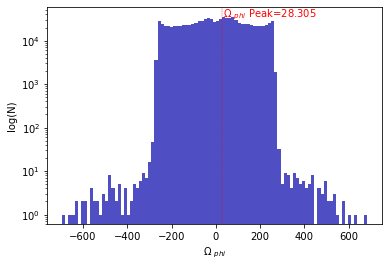

In [27]:

fig0=plt.figure()
ax=fig0.add_subplot(111)
nbins=int(len(ophis)**(1/3))
print(nbins)
n, bins, patches = ax.hist(x=ophis, bins=nbins, color='#0504aa', alpha=0.7,log="True")
ax.set_xlabel(r"$\Omega$ $_{phi}$")
ax.set_ylabel("log(N)")
plotname="omega_phi.png"

n_max_location=np.where(n==np.max(n))
bin_location=bins[n_max_location]
ax.axvline(bin_location,c='red',linestyle='--',lw=0.4)
ax.text(bin_location+5,n[n_max_location],r"$\Omega$ $_{phi}$ Peak="+str(round(bin_location[0],3)),c="red")

#fig0.savefig(plotpath+plotname,dpi=300)


# Making the cut

In [28]:
discindx=(mass<5000)
idd_snapshots=idd[discindx]
x_select=x[discindx]
y_select=y[discindx]
z_select=z[discindx]

vx_select=vx[discindx]
vy_select=vy[discindx]
vz_select=vz[discindx]


vr_select=vr[discindx]
vphi_select=vphi[discindx]
vzz_select=vzz[discindx]


r_select=r[discindx]
phi_select=phi_degrees[discindx]

In [29]:
print("These are the ids obtained from the frequency data",len(idd_from_freqs))
print("These are the ids obtained from the snapshot  data",len(idd_snapshots))

These are the ids obtained from the frequency data 996403
These are the ids obtained from the snapshot  data 996403


# Loading all saved barangles

In [ ]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping//New_Sims_Analysis/"
datafilename="0_to_1048_B3-N_fft_barangles_combined_degrees.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

# Checking resonance Conditions

In [ ]:
#datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
datafilename="B3-N_saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping//New_Sims_Analysis/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
#print(ps)
ps_700=ps[700]
print(ps_700)

# Adjusting pattern_speed_value

In [ ]:
start=700-3
end=700+3
s=0
c=0
for i in range(start,end):
    c+=1
    s=s+ps[i]
print(c)
ps_adjusted=s/c

print(ps_adjusted)

#factor=3.08567758/3.15576
#ps_adjusted=ps_adjusted/factor
print(ps_adjusted)

# Calculating the Resonance Conditions

In [ ]:
#OLR resonance
#olr_resonance=Ophidisk-Ordisk/2 # inner Linbald resonance

olr_resonance=Ophidisk+Ordisk/2 # outer Linbald resonance
omega_diff_olr=olr_resonance-ps_adjusted
keep_olr=(omega_diff_olr<0.1)*(omega_diff_olr>-0.1)


#CR resonance
omega_diff=Ophidisk-ps_adjusted
keep_cr=(omega_diff<0.1)*(omega_diff>-0.1)

# Entire Galactic Regions with Co-Rotating (CR) Resonance

In [ ]:
x_resonance_cr=(x_select[keep_cr])
y_resonance_cr=(y_select[keep_cr])
z_resonance_cr=(z_select[keep_cr])
vr_resonance_cr=(vr_select[keep_cr])
vphi_resonance_cr=(vphi_select[keep_cr])
vzz_resonance_cr=(vzz_select[keep_cr])

print(len(x_resonance_cr))

r_resonance_cr=r_select[keep_cr]
phi_resonance_cr=phi_select[keep_cr]

idd_resonance_cr=idd_snapshots[keep_cr]

datafilename=str(snapshot)+"idd_resonance_cr.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_cr, output)

# Calculating the percentage of stars that are in resonance with the bar:

In [ ]:
n_star=len(x_select)
n_star_cr=len(x_resonance_cr)

print(n_star)
print(n_star_cr)
percentage_cr=(n_star_cr/n_star)*100
print("The percentage of stars that are in Corotation Resonance is",percentage_cr)

# Entire Galactic Regions with OLR (Outer Linbald Resonance) Resonance

In [ ]:
x_resonance_olr=(x_select[keep_olr])
y_resonance_olr=(y_select[keep_olr])
z_resonance_olr=(z_select[keep_olr])
vr_resonance_olr=(vr_select[keep_olr])
vphi_resonance_olr=(vphi_select[keep_olr])
vzz_resonance_olr=(vzz_select[keep_olr])

r_resonance_olr=r_select[keep_olr]
phi_resonance_olr=phi_select[keep_olr]

n_star_olr=len(x_resonance_olr)
print(n_star_olr)
percentage_olr=(n_star_olr/n_star)*100
print("The percentage of stars that are in OLR are: ",percentage_olr)


idd_resonance_olr=idd_snapshots[keep_olr]

datafilename=str(snapshot)+"idd_resonance_olr.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_olr, output)


# Selecting the slice -5<phi<5

In [ ]:
keep_phi_slice_cr=(phi_resonance_cr<5)*(phi_resonance_cr>-5)
keep_phi_slice_olr=(phi_resonance_olr<5)*(phi_resonance_olr>-5)

phi_slice_cr=phi_resonance_cr[keep_phi_slice_cr]
print(len(phi_slice_cr))

phi_slice_olr=phi_resonance_olr[keep_phi_slice_olr]
print(len(phi_slice_olr))

# Keeping record of values for the slice -5<phi<5

In [ ]:
keep_phi_slice=(phi_select<5)*(phi_select>-5)
x_select_phi_slice=x_select[keep_phi_slice]
y_select_phi_slice=y_select[keep_phi_slice]
z_select_phi_slice=z_select[keep_phi_slice]

vr_phi_slice=vr_select[keep_phi_slice]
vphi_phi_slice=vphi_select[keep_phi_slice]
vzz_phi_slice=vzz_select[keep_phi_slice]
r_phi_slice=r_select[keep_phi_slice]

# Keeping record of values in the Solar Neighborhood

In [ ]:
keep_sn=(x_select<8.5)*(x_select>7.5)*(y_select<0.5)*(y_select>-0.5)*(z_select<0.5)*(z_select>-0.5)
x_select_sn=x_select[keep_sn]
y_select_sn=y_select[keep_sn]
z_select_sn=z_select[keep_sn]

vr_sn=vr_select[keep_sn]
vphi_sn=vphi_select[keep_sn]
vzz_sn=vzz_select[keep_sn]
r_sn=r_select[keep_sn]

# Corotating Resonance (CR) in the slice

In [ ]:
x_resonance_cr_phi_slice=x_resonance_cr[keep_phi_slice_cr]
y_resonance_cr_phi_slice=(y_resonance_cr[keep_phi_slice_cr])
z_resonance_cr_phi_slice=(z_resonance_cr[keep_phi_slice_cr])
vr_resonance_cr_phi_slice=(vr_resonance_cr[keep_phi_slice_cr])
vphi_resonance_cr_phi_slice=(vphi_resonance_cr[keep_phi_slice_cr])
vzz_resonance_cr_phi_slice=(vzz_resonance_cr[keep_phi_slice_cr])

r_resonance_cr_phi_slice=r_resonance_cr[keep_phi_slice_cr]

phi_resonance_cr_phi_slice=phi_resonance_cr[keep_phi_slice_cr]


idd_resonance_cr_phi_slice=idd_resonance_cr[keep_phi_slice_cr]

datafilename=str(snapshot)+"idd_resonance_cr_phi_slice.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_cr_phi_slice, output)


print(x_resonance_cr_phi_slice)

# OLR in the slice

In [ ]:
x_resonance_olr_phi_slice=x_resonance_olr[keep_phi_slice_olr]
y_resonance_olr_phi_slice=(y_resonance_olr[keep_phi_slice_olr])
z_resonance_olr_phi_slice=(z_resonance_olr[keep_phi_slice_olr])
vr_resonance_olr_phi_slice=(vr_resonance_olr[keep_phi_slice_olr])
vphi_resonance_olr_phi_slice=(vphi_resonance_olr[keep_phi_slice_olr])
vzz_resonance_olr_phi_slice=(vzz_resonance_olr[keep_phi_slice_olr])

r_resonance_olr_phi_slice=r_resonance_olr[keep_phi_slice_olr]

phi_resonance_olr_phi_slice=phi_resonance_olr[keep_phi_slice_olr]

idd_resonance_olr_phi_slice=idd_resonance_olr[keep_phi_slice_olr]

datafilename=str(snapshot)+"idd_resonance_olr_phi_slice.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_olr_phi_slice, output)

print(x_resonance_olr_phi_slice)

# Selecting the solar neighboorhood

In [ ]:
keep_cr_sn=(x_resonance_cr<8.5)*(x_resonance_cr>7.5)*(y_resonance_cr<0.5)*(y_resonance_cr>-0.5)*(z_resonance_cr<0.5)*(z_resonance_cr>-0.5)
keep_olr_sn=(x_resonance_olr<8.5)*(x_resonance_olr>7.5)*(y_resonance_olr<0.5)*(y_resonance_olr>-0.5)*(z_resonance_olr<0.5)*(z_resonance_olr>-0.5)

#keep_cr_sn=(x_resonance_cr<8.5)*(x_resonance_cr>7.5)
#keep_olr_sn=(x_resonance_olr<8.5)*(x_resonance_olr>7.5)

# CR in the Solar Neighborhood

In [ ]:
x_resonance_cr_sr=x_resonance_cr[keep_cr_sn]
y_resonance_cr_sr=(y_resonance_cr[keep_cr_sn])
z_resonance_cr_sr=(z_resonance_cr[keep_cr_sn])
vr_resonance_cr_sr=(vr_resonance_cr[keep_cr_sn])
vphi_resonance_cr_sr=(vphi_resonance_cr[keep_cr_sn])
vzz_resonance_cr_sr=(vzz_resonance_cr[keep_cr_sn])

r_resonance_cr_sr=r_resonance_cr[keep_cr_sn]

phi_resonance_cr_sr=phi_resonance_cr[keep_cr_sn]

idd_resonance_cr_sr=idd_resonance_cr[keep_cr_sn]

datafilename=str(snapshot)+"idd_resonance_cr_sr.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_cr_sr, output)



# OLR in the Solar Neighborhood

In [ ]:
x_resonance_olr_sr=(x_resonance_olr[keep_olr_sn])
y_resonance_olr_sr=(y_resonance_olr[keep_olr_sn])
z_resonance_olr_sr=(z_resonance_olr[keep_olr_sn])
vr_resonance_olr_sr=(vr_resonance_olr[keep_olr_sn])
vphi_resonance_olr_sr=(vphi_resonance_olr[keep_olr_sn])
vzz_resonance_olr_sr=(vzz_resonance_olr[keep_olr_sn])

r_resonance_olr_sr=r_resonance_olr[keep_olr_sn]
phi_resonance_olr_sr=phi_resonance_olr[keep_olr_sn]


idd_resonance_olr_sr=idd_resonance_olr[keep_olr_sn]

datafilename=str(snapshot)+"idd_resonance_olr_sr.pkl"
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(idd_resonance_olr_sr, output)

# Printing resonance data

In [ ]:
print("Ones with OLR resonance in the solar neighborhood: ",y_resonance_olr_sr)
print("Ones with CR resonance in the solar neighborhood: ",y_resonance_cr_sr)

# Plotting x and y of resonance regions in the entire galaxy

In [ ]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
#ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
#ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
#ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=20)
ax.text(13,30,r"Snapshot 700 (B3-N)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig3.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_y_vs_x_with_CR_resonance_regions_only.jpg"
#ax.set_aspect('equal')
fig3.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
fig3_1=plt.figure()
ax=fig3_1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
#ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
#ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=20)
ax.text(13,30,r"Snapshot 700 (B3-N)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig3_1.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3_1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_y_vs_x_with_OLR_over_CR_resonance_regions_only.jpg"
#ax.set_aspect('equal')
fig3_1.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
fig3_2=plt.figure()
ax=fig3_2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
#ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=15)
ax.text(13,30,r"Snapshot 700 (B3-N)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig3_2.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3_2.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_y_vs_x_with_CR_SN_over_others_resonance_regions_only.jpg"
#ax.set_aspect('equal')
fig3_2.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
fig3_3=plt.figure()
ax=fig3_3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=15)
ax.text(13,30,r"Snapshot 700 (B3-N)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig3_3.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3_3.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_y_vs_x_with_all_resonance_regions.jpg"
#ax.set_aspect('equal')
fig3_3.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
fig4=plt.figure()
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(13,30,r"Snapshot 700 (B3-N)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig4.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig4.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_y_vs_x_with_resonance_regions_whole_galaxy.jpg"
fig4.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
print(len(x_resonance_olr))
print(len(x_resonance_cr))
print(len(x_resonance_cr_sr))
print(len(x_resonance_olr_sr))

In [ ]:
print(np.max(vr_select))
plt.close()

In [ ]:
fig5=plt.figure()
ax=fig5.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(vr,vphi,extent=((-600,600,-600,600)),gridsize=500,mincnt=1,bins='log')
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
ax.scatter(vr_resonance_cr,vphi_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(vr_resonance_olr,vphi_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(vr_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
ax.scatter(vr_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(248,550,r"Snapshot 700 (B3-N)")

cbar_ax = fig5.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_v_phi_vs_vr_with_resonance_regions.jpg"
fig5.savefig(plotpath+plotname,bbox_inches="tight",dpi=200)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
fig5_1=plt.figure()
ax=fig5_1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(vr_sn,vphi_sn,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=30)
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
#ax.scatter(vr_resonance_cr,vphi_resonance_cr,c="black",marker=".",s=0.01,label="CR")
#ax.scatter(vr_resonance_olr,vphi_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(vr_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker="*",s=0.3,label="CR-SN")
ax.scatter(vr_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker="*",s=0.3,label="OLR-SN")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(80,285,r"Snapshot 700 (B3-N)")
ax.text(-180,285,r"7.5<x<8.5, -0.5<y<0.5, -0.5<z<0.5")

cbar_ax = fig5_1.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5_1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"B3-N_v_phi_vs_vr_with_resonance_region_in_sn_slice.jpg"
fig5_1.savefig(plotpath+plotname,bbox_inches="tight",dpi=300)
print("Plot generated and saved to file: ",plotname)
plt.close()

# Selecting a small angular region for analysis

In [ ]:
keep_phi=(phi_select<5)*(phi_select>-5)
vphi_slice=vphi_select[keep_phi]

r_slice=r_select[keep_phi]

fig6=plt.figure()
ax=fig6.add_subplot(212)
ax1=fig6.add_subplot(211)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(r_slice,vphi_slice,extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax.set_xlabel("R")
ax.set_ylabel(r"v$\phi$")
ax_cr=ax.scatter(r_resonance_cr_phi_slice,vphi_resonance_cr_phi_slice,c="black",marker=".",s=0.1,label="CR")
print(len(r_resonance_cr))
ax_olr=ax.scatter(r_resonance_olr_phi_slice,vphi_resonance_olr_phi_slice,c="red",marker=".",s=0.1,label="OLR")
ax.scatter(r_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker="*",s=0.1,label="CR-SN")
ax.scatter(r_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker="*",s=0.1,label="OLR-SN")

cbar_ax = fig6.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig6.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
ax.set_xlim(5,15)
ax.set_ylim(50,300)
#ax.legend(bbox_to_anchor=(0.77,0.93), loc='center left',markerscale=9)
ax.legend(bbox_to_anchor=(1.13,1.6), loc='center left',markerscale=9)

ax1.hexbin(r_slice,vphi_slice,extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax1.set_xlim(5,15)
ax1.set_ylim(50,300)
ax1.text(12,270,r"Slice -5<$\phi$<5")
#ax.legend(markerscale=6)
plotname=str(snapshot)+"B3-N_v_phi_vs_r_with_resonance_regions.jpg"
fig6.savefig(plotpath+plotname,bbox_inches="tight",dpi=300)
print("Plot generated and saved to file: ",plotname)
plt.close()

In [ ]:
print(r_resonance_cr_sr)

# Loading new sims demo !!!!

In [ ]:
from procedure import *

In [ ]:
path

In [ ]:
snaparr = loadwholesnap(path,90)

In [ ]:
print(snaparr[0].dtype)

In [ ]:
snaparr[(snaparr['x']>3)&(snaparr['y']<2)]['z']

In [ ]:
np.where(snaparr['idd']==241071075)[0]